In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/TimeSeriesCourse/practice/01 Basics')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np
import pandas as pd
import math
from numpy. linalg import norm


import sys
sys.path.append('/content/drive/MyDrive/TimeSeriesCourse/practice/01 Basics/datasets/part1/modules')

from metrics import *
from utils import *
from plots import *

In [ ]:
!pip install sktime

Задача 1

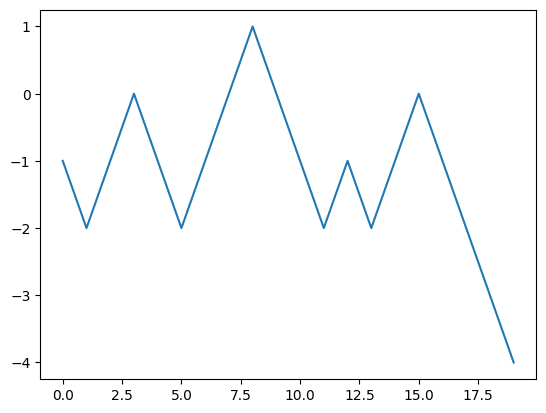

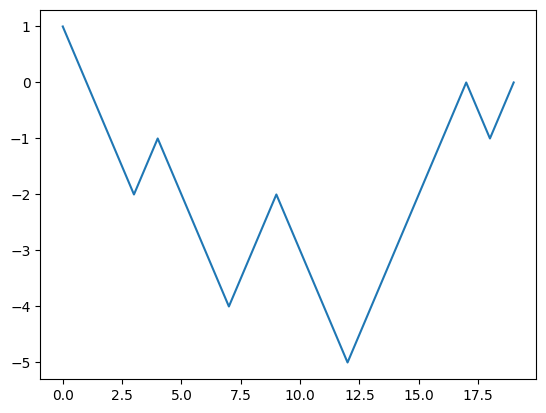

[[1, 2, 1, 2, 1], [-1, -2, -3, -4, -3], [-1, 0, 1, 0, -1], [1, 2, 3, 2, 1], [-1, 0, 1, 0, -1]]


In [ ]:
from random import seed
from random import random
from matplotlib import pyplot

def make_ts(n):
  random_walk = list()
  random_walk.append(-1 if random() < 0.5 else 1)
  for i in range(1, n):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
  return random_walk
t1 = make_ts(20)
t2 = make_ts(20)
pyplot.plot(t1)
pyplot.show()

pyplot.plot(t2)
pyplot.show()

data = []

for i in range(5):
  data.append(make_ts(5))

print(data)

In [ ]:
# def ED_distance(ts1, ts2):
#   ED = []

#   for i in range(len(ts1)):
#     ED.append((ts1[i] - ts2[i]) ** 2)

#   return math.sqrt(sum(ED))

# print(ED_distance(t1, t2)) # моя функция

t1 = np.array(t1)
t2 = np.array(t2)
print(np.linalg.norm(t1 - t2)) # проверка с помощью np

10.583005244258363


In [ ]:
from sktime.distances import euclidean_distance
import random

def test_ed_distance(ts1, ts2):

    sktime_ed_dist = round(euclidean_distance(ts1, ts2), 5)
    desired_ed_dist = round(ED_distance(ts1, ts2), 5)

    np.testing.assert_equal(sktime_ed_dist, desired_ed_dist, 'ED distances are not equal')

test_ed_distance(t1, t2)

Задача 2

In [ ]:
# def DTW_distance(series1, series2):
#     n = len(series1)
#     m = len(series2)

#     # Создаем матрицу для хранения вычисленных расстояний
#     dp = np.zeros((n, m))

#     # Заполняем первую строку и первый столбец матрицы
#     for i in range(n):
#         for j in range(m):
#             d = abs(series1[i] - series2[j]) ** 2
#             if i == 0 and j == 0:
#                 dp[i, j] = d
#             elif i == 0:
#                 dp[i, j] = d + dp[i, j - 1]
#             elif j == 0:
#                 dp[i, j] = d + dp[i - 1, j]
#             else:
#                 dp[i, j] = d + min(dp[i - 1, j], dp[i, j - 1], dp[i - 1, j - 1])

#     # Возвращаем значение DTW расстояния между последними элементами
#     return dp[n - 1, m - 1]


print(DTW_distance(t1, t2))


56.0


In [ ]:
import random

from sktime.distances import dtw_distance

def test_dtw_distance(ts1, ts2):

    sktime_dtw_dist = dtw_distance(ts1, ts2)
    desired_dtw_dist = DTW_distance(ts1, ts2)

    np.testing.assert_equal(sktime_dtw_dist, desired_dtw_dist, 'DTW distances are not equal')

test_dtw_distance(t1, t2)

Задача 3

In [ ]:
# def calculate_distance_matrix(data, metric='euclidean', normalize=True):

#     N = len(data[0]) # number of time series

#     # Initialize the distance matrix
#     distance_matrix = np.zeros(shape=(N, N))


#     for i in range(N):
#         for j in range(i, N):
#             distance = DTW_distance(data[0][i], data[1][j])
#             distance_matrix[i, j] = distance
#             distance_matrix[j, i] = distance  # Симметричность

#     return distance_matrix


In [ ]:
# data = [t1, t2]

In [ ]:
# print(calculate_distance_matrix(data))

In [ ]:
import numpy as np

def euclidean_distance(series1, series2):
    """
    Вычисляет евклидово расстояние между двумя временными рядами.

    :param series1: Первый временной ряд (numpy массив).
    :param series2: Второй временной ряд (numpy массив).
    :return: Евклидово расстояние между рядами.
    """
    return np.sqrt(np.sum((series1 - series2) ** 2))

def dtw_distance(series1, series2):
    """
    Вычисляет расстояние DTW (Dynamic Time Warping) между двумя временными рядами.

    :param series1: Первый временной ряд (numpy массив).
    :param series2: Второй временной ряд (numpy массив).
    :return: Расстояние DTW между рядами.
    """
    n, m = len(series1), len(series2)
    # Создаем матрицу для хранения промежуточных результатов DTW.
    dtw_matrix = np.zeros((n + 1, m + 1))

    # Заполняем матрицу начальными значениями.
    for i in range(1, n + 1):
        dtw_matrix[i, 0] = float('inf')
    for j in range(1, m + 1):
        dtw_matrix[0, j] = float('inf')

    # Заполняем матрицу поочередно вычисляя минимальные расстояния.
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = euclidean_distance(series1[i - 1], series2[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])

    # Возвращаем расстояние DTW между последними элементами рядов.
    return dtw_matrix[n, m]

def distance_matrix(time_series):
    """
    Вычисляет матрицу расстояния между временными рядами с использованием DTW.

    :param time_series: Список временных рядов (список numpy массивов).
    :return: Матрица расстояния (квадратная и симметричная относительно главной диагонали).
    """
    num_series = len(time_series)
    distance_matrix = np.zeros((num_series, num_series))

    for i in range(num_series):
        for j in range(i, num_series):
            distance = dtw_distance(time_series[i], time_series[j])
            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance  # Симметричность

    return distance_matrix

print(distance_matrix(data))

def distance_matrix_ED(time_series):
    """
    Вычисляет матрицу расстояния между временными рядами с использованием ED.

    :param time_series: Список временных рядов (список numpy массивов).
    :return: Матрица расстояния (квадратная и симметричная относительно главной диагонали).
    """
    num_series = len(time_series)
    distance_matrix = np.zeros((num_series, num_series))

    for i in range(num_series):
        for j in range(i, num_series):
            distance = ED_distance(time_series[i], time_series[j])
            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance  # Симметричность

    return distance_matrix

print(distance_matrix_ED(data))

[[ 0.         82.51236744 84.46604294 83.33052944 87.30860098 90.29000655
  89.73052356 86.18062661 84.06773974 87.59076101 86.04062411 85.77322494
  86.18925919 82.84409906 83.20611568 84.9503847  68.73657859 69.60210886
  67.95643826 67.47216929 63.6341078  61.830044   61.66271478 61.83555139
  63.96471945 58.77328438 61.93124007 55.35380649 51.98203479 39.2169437 ]
 [82.51236744  0.          8.94501492 10.69506076 10.07612156 10.29703631
   8.80841009  9.65229229  8.77069925  9.25967543  9.74731301  8.69640115
  10.1025451  11.24457526  9.5393833  10.97841183 10.65676515 13.41275484
  12.53456878 15.32274849 14.08631918 17.31122154 15.24284228 21.38101718
  20.0299968  20.52472671 18.67582865 22.96952309 27.33170277 30.31777985]
 [84.46604294  8.94501492  0.          9.65283375  8.96853085 12.03445626
   8.24439364 10.51857159  8.12564226 10.54435804  8.97866581  8.99200712
   8.95688707 11.30187848  9.47264968  9.78366973 12.66038503 11.74876933
  12.28145059 14.49015233 15.7970812

Задача 4

In [ ]:
def load_ts(file_name):

    ts = pd.read_csv(file_name, header=None, delim_whitespace=True)

    return ts

In [ ]:
url = './datasets/part1/CBF_TRAIN.txt'

data = load_ts(url)

ts_set = data.iloc[:, 1:].to_numpy()
labels = data.iloc[:, 0].squeeze().to_numpy()

In [ ]:
plot_ts_set(ts_set, title="CBF_TRAIN")

In [ ]:
dm = distance_matrix(ts_set)
print(dm)

[[  0.          35.04936822  34.32220977  55.69167593  54.69699687
   62.13874826  31.53614471  52.5920413   49.34855416  28.84722217
   51.08158748  58.38141549  87.40512501  52.49507554  52.71374764
   45.04065762  43.61695482  52.50791778  39.5663593   55.57199566
   64.09192179  47.01358623  37.13086778  74.51877158  45.68764809
   57.53045642  56.91358451  52.32959444  52.83264898  30.68058439]
 [ 35.04936822   0.          53.72580045  70.37930277  54.42614315
   75.20866046  29.64724166  64.52804998  55.83157214  30.13390693
   61.66544823  71.6898058   55.2768053   62.9601586   53.75939749
   55.37971265  53.58100058  55.88929903  27.10549237  71.06380026
   73.84955372  54.88460787  28.09746044  65.86560169  48.94815106
   66.48392318  69.13386541  64.42747098  61.5556949   27.32490526]
 [ 34.32220977  53.72580045   0.          44.30213102  60.37728572
   43.63894696  47.87878126  45.76001638  41.03241484  41.92842765
   40.53448154  49.78328987 101.74189711  42.39502011  56.65

In [ ]:
dm_ED = distance_matrix_ED(ts_set)

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


class TimeSeriesHierarchicalClustering:
    """
    Hierarchical Clustering of time series.

    Parameters
    ----------

    n_clusters : int, default = 3
        The number of clusters.

    method : str, default = 'complete'
        The linkage criterion.
        Options: {single, complete, average, weighted}.

    model : sklearn object
        An sklearn agglomerative clustering.
    """

    def __init__(self, n_clusters=3, method='complete'):

        self.n_clusters = n_clusters
        self.method = method
        self.model = None
        self.linkage_matrix = None


    def _create_linkage_matrix(self):
        """
        Build the linkage matrix.

        Returns
        -------
        linkage matrix : numpy.ndarray
            The linkage matrix.
        """

        counts = np.zeros(self.model.children_.shape[0])
        n_samples = len(self.model.labels_)

        for i, merge in enumerate(self.model.children_):
            current_count = 0
            for child_idx in merge:
                if child_idx < n_samples:
                    current_count += 1  # leaf node
                else:
                    current_count += counts[child_idx - n_samples]
            counts[i] = current_count

        linkage_matrix = np.column_stack([self.model.children_, self.model.distances_, counts]).astype(float)

        return linkage_matrix


    def fit(self, distance_matrix):
        """
        Fit the agglomerative clustering model based on distance matrix.

        Parameters
        ----------
        distance_matrix : numpy.ndarray (2d array of shape (ts_number, ts_number))
            The distance matrix between instances of dataset.

        Returns
        -------
        self: object
            The fitted model.
        """

        # AgglomerativeClustering().fit(distance_matrix) n_clusters=3, metric="precomputed", linkage="complete"
        self.model = AgglomerativeClustering(compute_distances = True).fit(distance_matrix)

        return self


    def _draw_timeseries_allclust(self, dx, labels, leaves, gs, ts_hspace):
        """
        Plot time series graphs beside dendrogram.

        Parameters
        ----------
        dx : dataframe
            The original timeseries data with column "y" indicating cluster number.

        labels : numpy.ndarray
            Labels of dataset's instances.

        leaves : list
            Leave node names from scipy dendrogram.

        gs : matplotlib object
            Gridspec configurations.

        ts_hspace : int
            Horizontal space in gridspec for plotting time series.
        """

        prop_cycle = plt.rcParams['axes.prop_cycle']
        colors = prop_cycle.by_key()['color']
        margin = 7

        max_cluster = len(leaves)
        # flip leaves, as gridspec iterates from top down
        leaves = leaves[::-1]

        for cnt in range(len(leaves)):
            plt.subplot(gs[cnt:cnt+1, max_cluster-ts_hspace:max_cluster])
            plt.axis("off")

            # get leafnode name, which corresponds to original data index
            leafnode = leaves[cnt]
            ts = dx[leafnode]
            ts_len = ts.shape[0] - 1

            label = int(labels[leafnode])
            color_ts = colors[label]

            plt.plot(ts, color=color_ts)
            plt.text(ts_len+margin, 0, f'class = {label}')


    def plot_dendrogram(self, df, labels, ts_hspace=12, title='Dendrogram'):
        """
        Draw agglomerative clustering dendrogram with timeseries graphs for all clusters.

        Parameters
        ----------
        df : dataframe
            Dataframe with each row being the time window of readings.

        labels : numpy.ndarray
            Labels of dataset's instances.

        ts_hspace : int, default = 12
            Horizontal space for timeseries graph to be plotted.

        title : str, default = 'Dendrogram'
            Title of dendrogram.
        """
        self.linkage_matrix = self._create_linkage_matrix()
        max_cluster = len(self.linkage_matrix) + 1

        plt.figure(figsize=(12, 9))

        # define gridspec space
        gs = gridspec.GridSpec(max_cluster, max_cluster)

        # add dendrogram to gridspec
        # add -1 to give timeseries graphs more space
        plt.subplot(gs[:, 0 : max_cluster - ts_hspace - 1])
        plt.xlabel("Distance")
        plt.ylabel("Cluster")
        plt.title(title, fontsize=16, weight='bold')

        ddata = dendrogram(self.linkage_matrix, orientation="left", color_threshold=sorted(self.model.distances_)[-2], show_leaf_counts=True)

        self._draw_timeseries_allclust(df, labels, ddata["leaves"], gs, ts_hspace)



In [ ]:
obj = TimeSeriesHierarchicalClustering()
obj.fit(dm)

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:833: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



In [ ]:
obj_ED = TimeSeriesHierarchicalClustering()
obj_ED.fit(dm_ED)

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:833: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



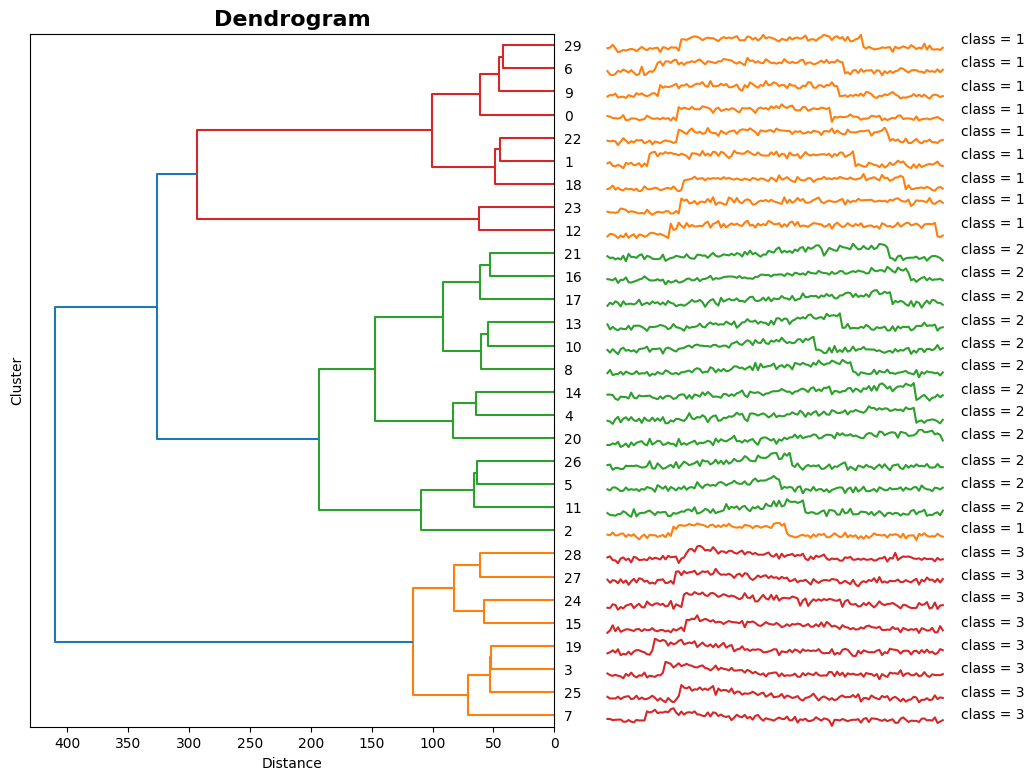

In [ ]:
obj.plot_dendrogram(ts_set, labels)


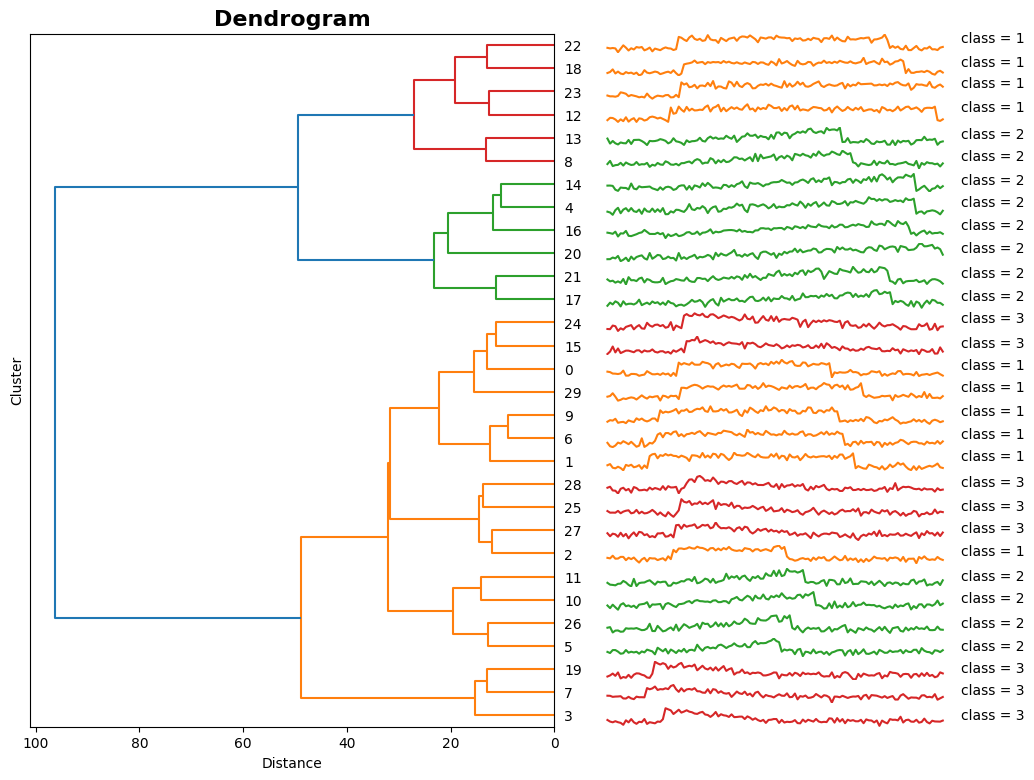

In [ ]:
obj_ED.plot_dendrogram(ts_set, labels)